# Graded Challenge 2

Nama : Luvi Puspitasari
Batch : 11

In [2]:
import numpy as np
import sympy as sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import minimize_scalar

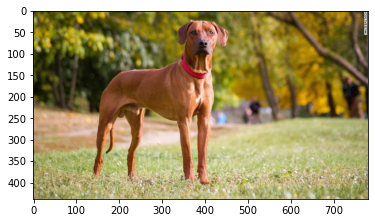

In [3]:
# Import Gambar  menggunakan library plt

image = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpeg')
plt.imshow(image)

In [3]:
image

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [4]:
image.shape

(438, 780, 3)

In [21]:
# Mencari vektor gradien (turunan Parsial)
# convert 3D array to 2D array dengan cara grayscale

First = image[:,:,0]
Second = image[:,:,1]
Third = image[:,:,2]

print('Shape F:', First.shape)
print('Shape S:',Second.shape)
print('Shape T:',Third.shape)

Shape F: (438, 780)
Shape S: (438, 780)
Shape T: (438, 780)


Text(0.5, 1.0, 'Gambar Filter T')

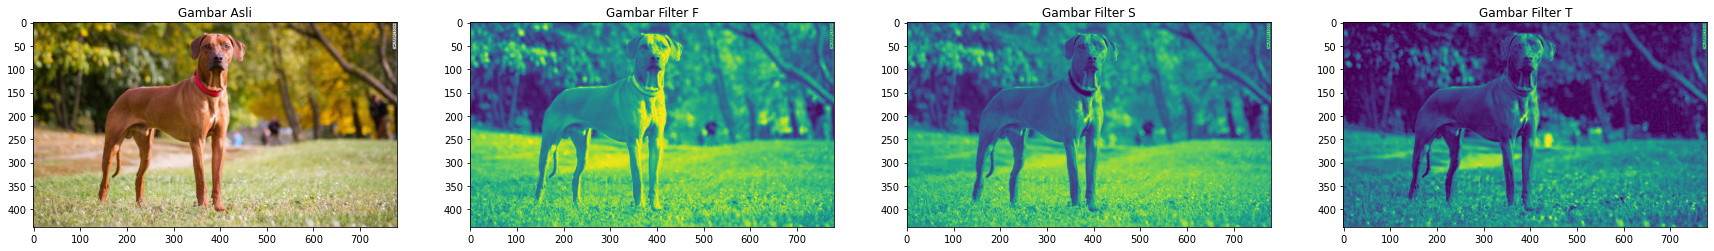

In [17]:
fig, ax = plt.subplots(ncols=4,figsize=(30,20))
ax[0].imshow(image)
ax[0].set_title('Gambar Asli')
ax[1].imshow(First)
ax[1].set_title('Gambar Filter F')
ax[2].imshow(Second)
ax[2].set_title('Gambar Filter S')
ax[3].imshow(Third)
ax[3].set_title('Gambar Filter T')

In [ ]:
# 1. Dari gambar diatas, 'Gambar Asli'merupakan gambar yang masih berbentuk tensor
# 2. 'Gambar Filter F' merupakan gambar pertama yang sudah berbentuk matriks
# 3. 'Gambar Filter S' merupakan gambar kedua yang sudah berbentuk matriks
# 4. 'Gambar Filter T' merupakan gambar ketiga yang sudah berbentuk matriks

In [20]:
# Kombinasi 3 channel menjadi 1

grey = 0.2989*First + 0.587*Second + 0.114*Third

grey.shape

# hasil dibawah ini sudah berupa kombinasi antara 3 channel

(438, 780)

Text(0.5, 1.0, 'greyscale dengan cmap')

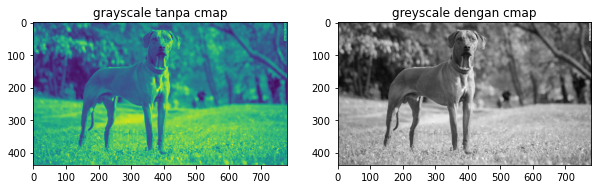

In [32]:
# Menampilkan menjadi filter Gray (secara visual)

fig, ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].imshow(grey)
ax[0].set_title('grayscale tanpa cmap')
ax[1].imshow(grey, cmap='gray')
ax[1].set_title('greyscale dengan cmap')

### Perkalian 2 Matrix


In [23]:
First.shape

(438, 780)

In [24]:
Second.shape

(438, 780)

Text(0.5, 1.0, 'Gambar Second x Matrix')

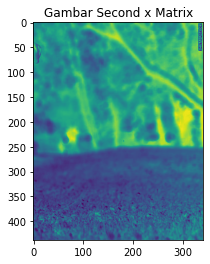

In [30]:
matrix = (-1)*np.eye(780)[:,438:]
ts = Second @ matrix
plt.imshow(ts)
plt.title('Gambar Second x Matrix')

# karena baris pada 'Gambar Second (438,780)',
#  sehingga untuk Matrix nya disesuaikan agar mendapatkan hasil untuk bagian baris di matrix kedua

### Turunan 


Text(0.5, 1.0, '$\\partial_y img$')

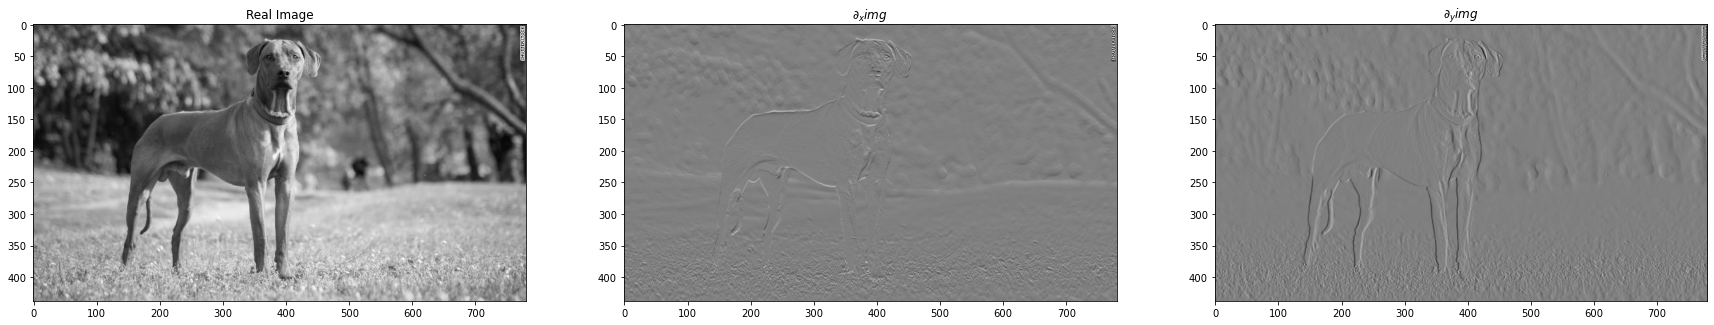

In [36]:
# Menurunkan gambar matrix menjadi 2D

dx, dy = np.gradient(grey)

fig, ax = plt.subplots(ncols=3,figsize=(30,20))

ax[0].imshow(grey, cmap='gray')
ax[0].set_title('Real Image')

ax[1].imshow(dx, cmap='gray')
ax[1].set_title(r'$\partial_x img$')

ax[2].imshow(dy,cmap='gray')
ax[2].set_title(r'$\partial_y img$')

In [26]:
### Hitung turunan dari f(x) = dI/dx dan f(y) = dI/dy
X = np.linspace(0,10,100)
Y = 4 + 2 * np.sin(2 * x)

NameError: name 'x' is not defined

In [24]:
X.shape

(50,)

In [13]:
#np.linspace

X = np.linspace(3,438,780)

In [14]:
X

array([  3.        ,   3.55840822,   4.11681643,   4.67522465,
         5.23363286,   5.79204108,   6.35044929,   6.90885751,
         7.46726573,   8.02567394,   8.58408216,   9.14249037,
         9.70089859,  10.2593068 ,  10.81771502,  11.37612323,
        11.93453145,  12.49293967,  13.05134788,  13.6097561 ,
        14.16816431,  14.72657253,  15.28498074,  15.84338896,
        16.40179718,  16.96020539,  17.51861361,  18.07702182,
        18.63543004,  19.19383825,  19.75224647,  20.31065469,
        20.8690629 ,  21.42747112,  21.98587933,  22.54428755,
        23.10269576,  23.66110398,  24.2195122 ,  24.77792041,
        25.33632863,  25.89473684,  26.45314506,  27.01155327,
        27.56996149,  28.1283697 ,  28.68677792,  29.24518614,
        29.80359435,  30.36200257,  30.92041078,  31.478819  ,
        32.03722721,  32.59563543,  33.15404365,  33.71245186,
        34.27086008,  34.82926829,  35.38767651,  35.94608472,
        36.50449294,  37.06290116,  37.62130937,  38.17

In [15]:
X.shape

(780,)